# **Telecom Customer Churn Prediction**

## **1. Business Objective**

Churn quantifies the number of customers who have unsubscribed or canceled their service contract. Customers turning their back to your service or product are no fun for any business. It is very expensive to win them back once lost, not even thinking that they will not do the best word to mouth marketing if unsatisfied.

The basic layer for predicting future customer churn is data from the past. We look at data from customers that already have churned (response) and their characteristics / behaviour (predictors) before the churn happened.

In our case the objective is reducing customer churn by identifying potential churn candidates beforehand, and take proactive actions to make them stay.


## **2. Data Collection**

The dataset has been obtained from kaggle. [Click here to download it](https://www.kaggle.com/blastchar/telco-customer-churn)

The raw dataset contains more than 7000 entries. All entries have several features and of course a column stating if the customer has churned or not.

In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [ ]:
# Importing sklearn libraries needed

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modeling.

In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
telco_data = pd.read_csv(file_path)

In [ ]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", telco_data.shape[0])
print("The number of features are : ", telco_data.shape[1])
print("The list of features is : ", telco_data.columns)
telco_data.head()

The number of records are :  7043
The number of features are :  21
The list of features is :  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### There are approximately ~7000 records with 21 features in the dataset.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


#### **3.1.1 Feature Cleaning**

We will try to convert the object type features to numeric whereever possible.

In [ ]:
# Checking basic info of the dataset

telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Converting the feature "TotalCharges" to numeric float.
telco_data['TotalCharges'] = np.where(telco_data['TotalCharges']==" ", np.nan, telco_data['TotalCharges'])

#### **3.1.2 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [ ]:
# Checking the percentage of missing values

print("The features and its count is as follows:\n", telco_data.isnull().mean() * 100)

The features and its count is as follows:
 customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


In [ ]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'])

In [ ]:
# "TotalCharges" can be calculate using tenure * MonthlyCharges

telco_data["Total_Charges"] = telco_data["MonthlyCharges"] * telco_data["tenure"]

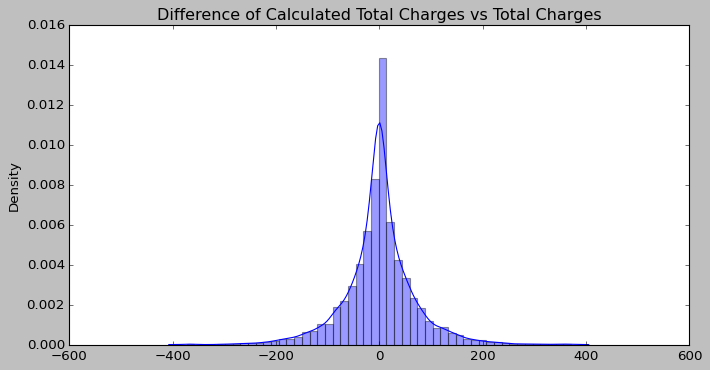

In [ ]:
plt.title("Difference of Calculated Total Charges vs Total Charges")
sns.distplot(telco_data["Total_Charges"]- telco_data["TotalCharges"]);

In [ ]:
def  CalculateTotalCharges(telco_data):
    tenure = telco_data["tenure"]
    monthly_charges = telco_data["MonthlyCharges"]
    total_charges = telco_data["TotalCharges"]

    for idx in range(0, len(total_charges)):
        if total_charges[idx] == np.nan:
            if monthly_charges[idx] == 0:
                total_charges[idx] = monthly_charges[idx]
            else:
                total_charges[idx] = monthly_charges[idx] * tenure[idx]

    return total_charges

telco_data["TotalCharges"] =  CalculateTotalCharges(telco_data)

##### We have handled the missing data.


#### **3.1.3 Dropping unncessary features**

We may drop unneccesary features that may not contribute to the prediction.

In [ ]:
# Dropping Customer ID
telco_data.drop(labels=["customerID", "Total_Charges"], axis=1, inplace=True)

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **3.2.1 Univarite Analysis**

We will begin with analyzing the individual features of the dataset.

In [ ]:
# Extracting the binary features from the dataset

features = telco_data.columns
binary_feats = []
for col in features:
    if telco_data[col].value_counts().shape[0] == 2:
        binary_feats.append(col)

In [ ]:
binary_feats

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

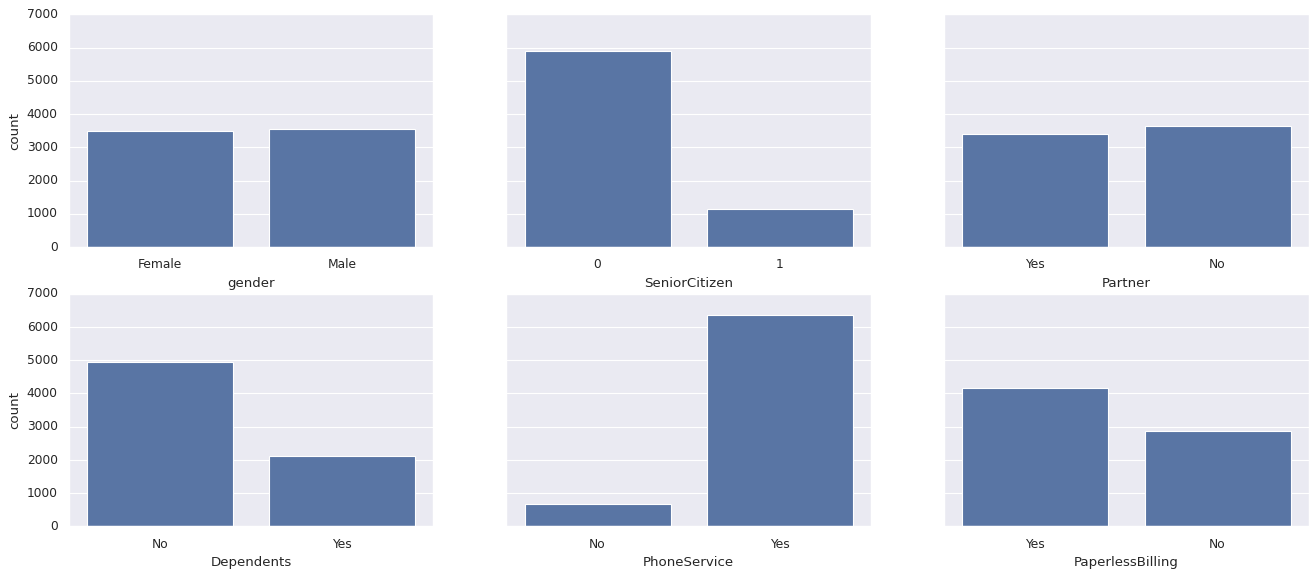

In [ ]:
# Plotting the countplot for the features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(20, 8), sharey=True)

sns.countplot(x="gender", data=telco_data, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=telco_data, ax=axes[0,1])
sns.countplot(x="Partner", data=telco_data, ax=axes[0,2])
sns.countplot(x="Dependents", data=telco_data, ax=axes[1,0])
sns.countplot(x="PhoneService", data=telco_data, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=telco_data, ax=axes[1,2]);

##### Obserations:
There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

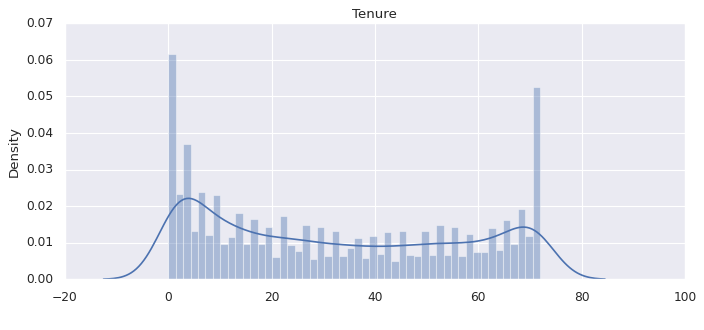

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
fig, ax1 = plot_objects

sns.distplot(telco_data["tenure"], bins=50 , ax=ax1)
ax1.set_title("Tenure")
ax1.set_xlabel(" ");

In [ ]:
telco_data["tenure"].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


##### Observations:

The distribution seems to have two distribution with the high tenure values at 0 and 70 years. Most of the customers are either pretty new or have stayed for a long time with the company.

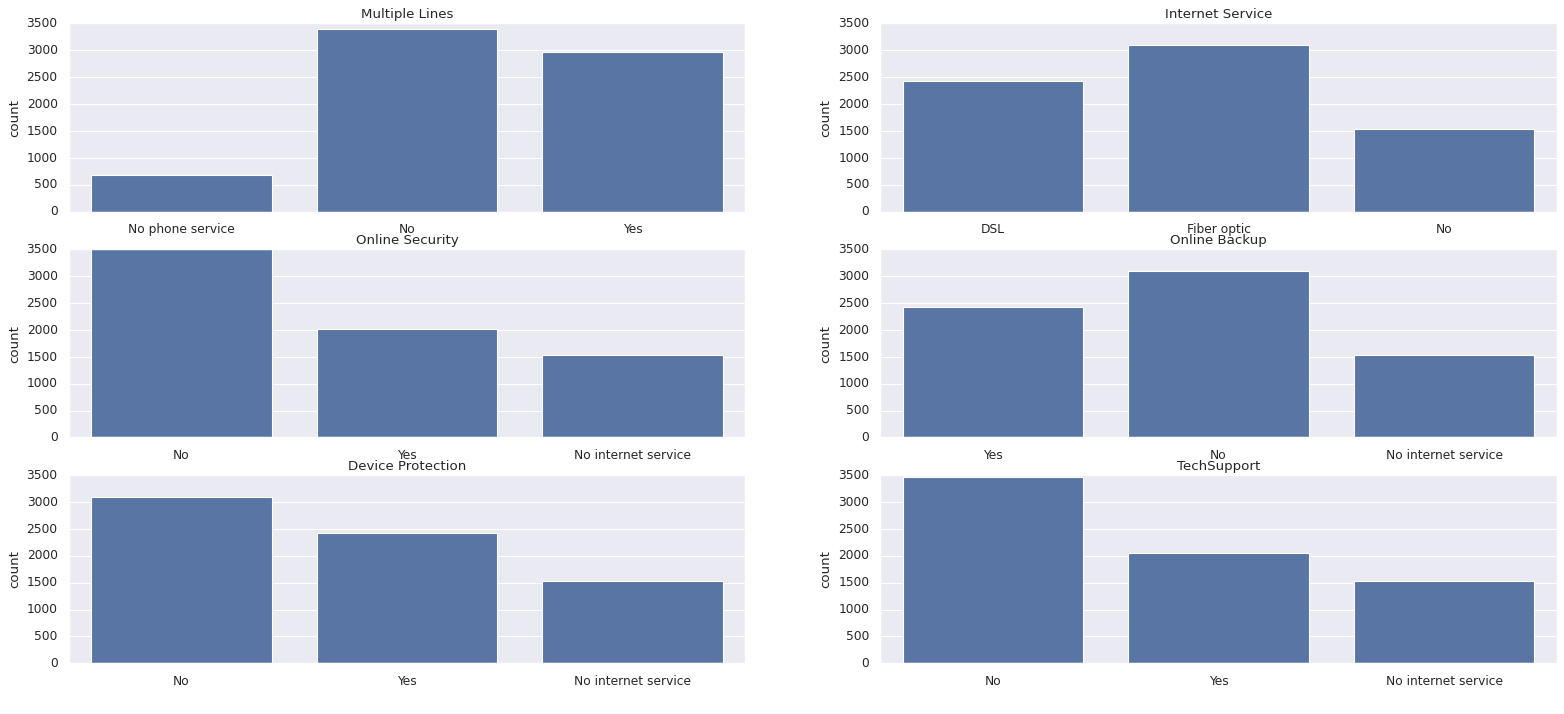

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=3, ncols=2, figsize=(24, 10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plot_objects

sns.countplot(x = "MultipleLines", data = telco_data, ax=ax1)
ax1.set_title("Multiple Lines")
ax1.set_xlabel(" ")

sns.countplot(x = "InternetService", data = telco_data, ax=ax2)
ax2.set_title("Internet Service")
ax2.set_xlabel(" ")

sns.countplot(x = "OnlineSecurity", data = telco_data, ax=ax3)
ax3.set_title("Online Security")
ax3.set_xlabel(" ")

sns.countplot(x = "OnlineBackup", data = telco_data, ax=ax4)
ax4.set_title("Online Backup")
ax4.set_xlabel(" ")

sns.countplot(x = "DeviceProtection", data = telco_data, ax=ax5)
ax5.set_title("Device Protection")
ax5.set_xlabel(" ")

sns.countplot(x = "TechSupport", data = telco_data, ax=ax6)
ax6.set_title("TechSupport")
ax6.set_xlabel(" ");

##### **Observations**
1. "Multiple Lines" feature looks skewed as there are very few people with "No Phone Service"
2. Rest of the 5 categorical features looks to have proportional representation.

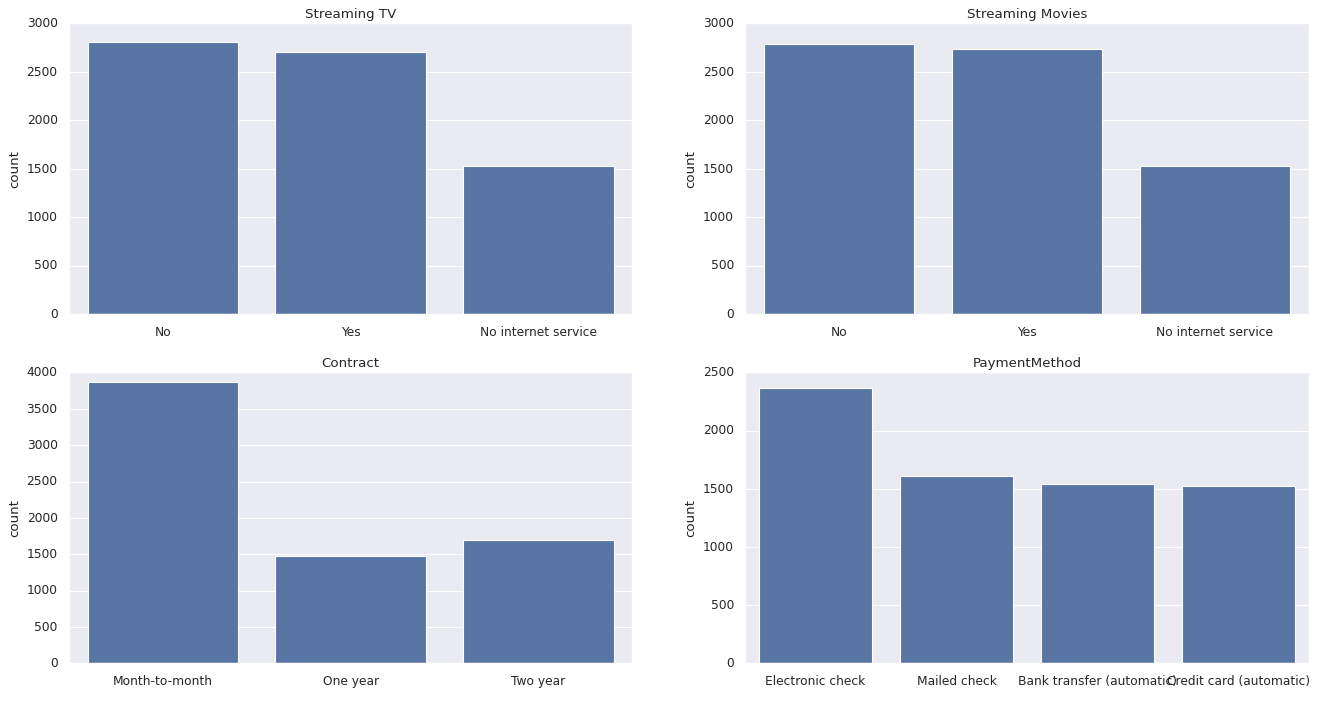

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

sns.countplot(x = "StreamingTV", data = telco_data, ax=ax1)
ax1.set_title("Streaming TV")
ax1.set_xlabel(" ")

sns.countplot(x = "StreamingMovies", data = telco_data, ax=ax2)
ax2.set_title("Streaming Movies")
ax2.set_xlabel(" ")

sns.countplot(x = "Contract", data = telco_data, ax=ax3)
ax3.set_title("Contract")
ax3.set_xlabel(" ")

sns.countplot(x = "PaymentMethod", data = telco_data, ax=ax4)
ax4.set_title("PaymentMethod")
ax4.set_xlabel(" ");

##### **Observations**

1. There are many people with "no internet service" when it comes to "Streaming TV and Movies"
2. A high proportion of "Contracts" are Month-to-month.

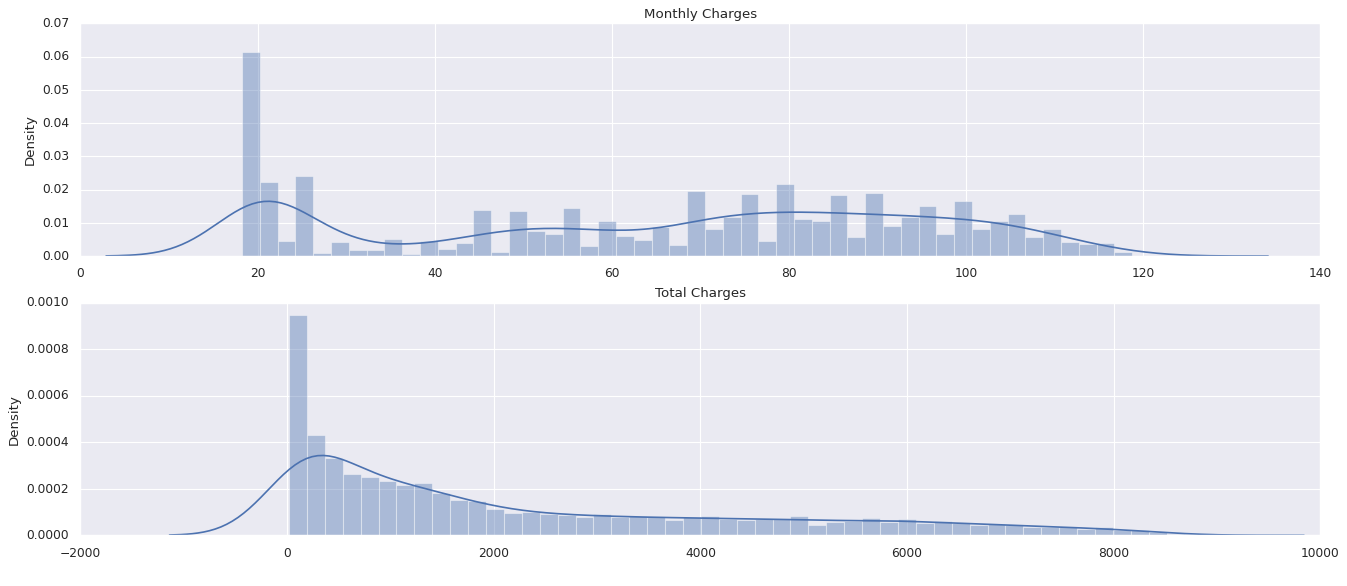

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
fig, (ax1, ax2) = plot_objects

sns.distplot(telco_data["MonthlyCharges"], bins=50 , ax=ax1)
ax1.set_title("Monthly Charges")
ax1.set_xlabel(" ")

sns.distplot(telco_data["TotalCharges"], bins=50 , ax=ax2)
ax2.set_title("Total Charges")
ax2.set_xlabel(" ");

##### **Observations**
1. The "Monthly Charges" feature has a huge spread.
2. The "Total Charges" feature is highly right skewed and may need to transformed.

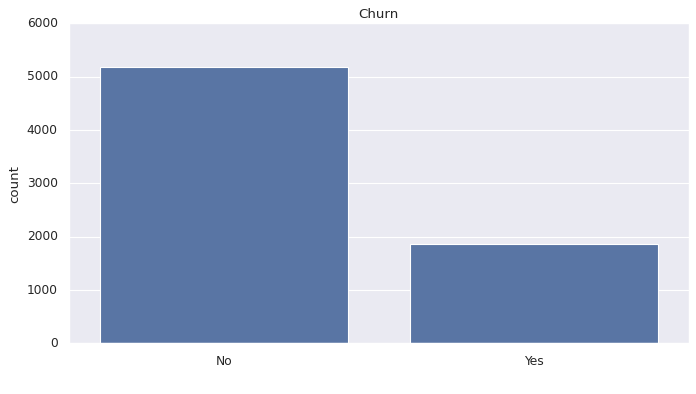

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
fig, ax1 = plot_objects

sns.countplot(x = "Churn", data = telco_data, ax=ax1)
ax1.set_title("Churn")
ax1.set_xlabel(" ");

##### **Observations**
1. The dependent feature "Churn" is highly imbalanced and we must apply sampling techniques to have balanced representation.

### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns.

In [ ]:
dict_boolean = {"Yes":1, "No":0}

In [ ]:
telco_data["Churn"] = telco_data["Churn"].replace(dict_boolean)

In [ ]:
# Checking if Churn rate is different varies categorical values.

print("The Churn rate for Gender : \n",telco_data[['gender','Churn']].groupby(['gender']).mean())
print("\nThe Churn rate for Senior Citizen : \n",telco_data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print("\nThe Churn rate for Partner : \n",telco_data[['Partner','Churn']].groupby(['Partner']).mean())
print("\nThe Churn rate for Dependents : \n",telco_data[['Dependents','Churn']].groupby(['Dependents']).mean())
print("\nThe Churn rate for PhoneService : \n",telco_data[['PhoneService','Churn']].groupby(['PhoneService']).mean())

The Churn rate for Gender : 
            Churn
gender          
Female  0.269209
Male    0.261603

The Churn rate for Senior Citizen : 
                   Churn
SeniorCitizen          
0              0.236062
1              0.416813

The Churn rate for Partner : 
             Churn
Partner          
No       0.329580
Yes      0.196649

The Churn rate for Dependents : 
                Churn
Dependents          
No          0.312791
Yes         0.154502

The Churn rate for PhoneService : 
                  Churn
PhoneService          
No            0.249267
Yes           0.267096


##### **Observations:**
1. Average churn rate for males and females are approximately the same which indicates gender feature does not bring a valuable prediction power to a model.
2. Average churn rate for Senior Citizens is higher than non senior citizens.
3. Average churn rate for people with no partner is higher than people with partner.
4. Average churn rate for people with dependents is higher than people with no dependents.
5. Average churn rate for people with and withour Phone Services are approximately the same.

In [ ]:
# Checking the churn rate for gender and senior citizen

pd.pivot_table(telco_data, values='Churn', index=['gender'], columns=['SeniorCitizen'], aggfunc=np.mean)

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [ ]:
# Checking the churn rate for Multiple Lines

pd.pivot_table(telco_data, values='Churn', index=['MultipleLines'], aggfunc=np.mean)

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [ ]:
# Checking the churn rate for Internet Service

pd.pivot_table(telco_data, values='Churn', index=['InternetService'], aggfunc=np.mean)

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [ ]:
# Checking the churn rate for Online Security

pd.pivot_table(telco_data, values='Churn', index=['OnlineSecurity'], aggfunc=np.mean)

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [ ]:
# Checking the churn rate for Online Backup

pd.pivot_table(telco_data, values='Churn', index=['OnlineBackup'], aggfunc=np.mean)

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [ ]:
# Checking the churn rate for Device Protection

pd.pivot_table(telco_data, values='Churn', index=['DeviceProtection'], aggfunc=np.mean)

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [ ]:
# Checking the churn rate for Tech Support

pd.pivot_table(telco_data, values='Churn', index=['TechSupport'], aggfunc=np.mean)

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [ ]:
# Checking the churn rate for Streaming TV

pd.pivot_table(telco_data, values='Churn', index=['StreamingTV'], aggfunc=np.mean)

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [ ]:
# Checking the churn rate for Streaming Movies

pd.pivot_table(telco_data, values='Churn', index=['StreamingMovies'], aggfunc=np.mean)

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [ ]:
# Checking the churn rate for Contract

pd.pivot_table(telco_data, values='Churn', index=['Contract'], aggfunc=np.mean)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [ ]:
# Checking the churn rate for Paperless Billing

pd.pivot_table(telco_data, values='Churn', index=['PaperlessBilling'], aggfunc=np.mean)

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [ ]:
# Checking the churn rate for Payment Method

pd.pivot_table(telco_data, values='Churn', index=['PaymentMethod'], aggfunc=np.mean)

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


##### **Observations**
1. Even after viewing "Senior Citizens" along with "gender" the avg. Churn rate seems to similar with inclination towards senior citizen.
2. The Churn rate seems to similar for each type of "Multiple Lines"
3. People with fiber optic as their "Internet Service" seems to show higher churn rate than DSL.
4. People with no "Online Security" have higher churn rate as compared to other forms of Online Security.
5. People with no "Online Backup" have higher churn rate as compared to other forms of Online Backup.
6. People with no "Device Protection" have higher churn rate as compared to other forms of Device protections.
7. People with no "Tech Support" have higher churn rate as compared to other forms of Tech Support.
8. The churn rate is lower for people with "no internet service" but similar for people who Stream TV or not.
9. The churn rate is lower for people with "no internet service" but similar for people who Stream movies or not.
10. The churn rate is significantly higher for people with short contracts like month-to-month as compared to one-year or two-year, which means the churn rate gets lowers as contract length increases.
11. The churn rate is higher for individuals who opt for "Paperless Billing" as compared to those who doesn't.
12. Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.

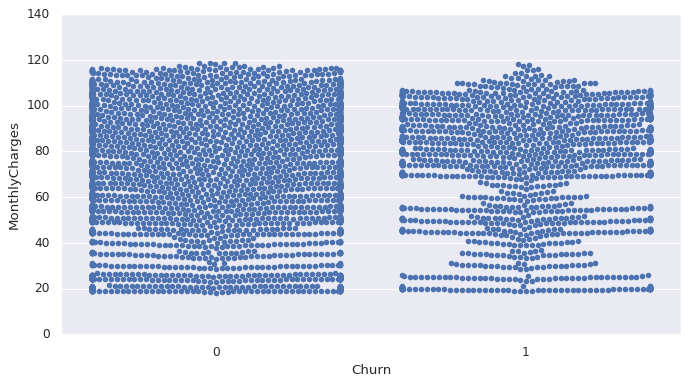

In [ ]:
sns.swarmplot(x="Churn", y="MonthlyCharges", data=telco_data);

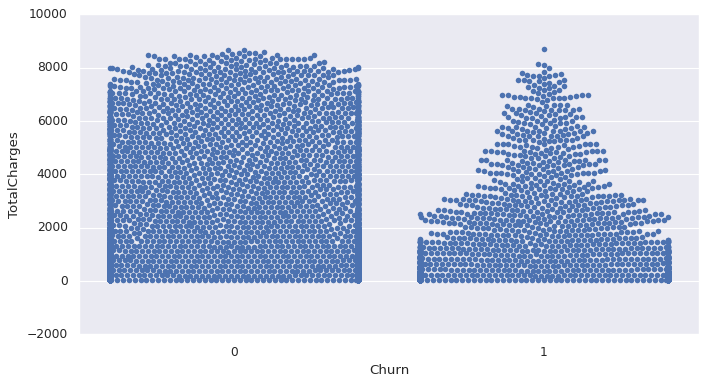

In [ ]:
sns.swarmplot(x="Churn", y="TotalCharges", data=telco_data);

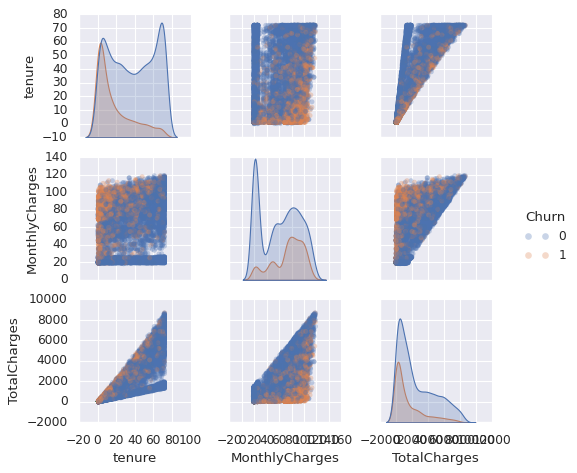

In [ ]:
sns.pairplot(telco_data[['tenure',
                         'MonthlyCharges',
                         'TotalCharges',
                         'Churn']],
             hue='Churn',
             plot_kws=dict(alpha=.3,
                           edgecolor='none'),
             height=2,
             aspect=1.1
             );

In [ ]:
# Checking the churn rate for tenure and Monthly Charges

telco_data[["tenure", "MonthlyCharges", "Churn"]].groupby("Churn").mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


##### **Observations**
It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.
It seems like monthly charges also have an effect on churn rate.

In [ ]:
# Checking the churn rate for tenure and Monthly Charges

telco_data[["tenure", "Contract"]].groupby("Contract").mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


##### **Observations**

Contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts.

### **3.3 Feature Engineering**

#### **3.3.1 Feature Selection**

Selecting the important features for ML algos.

##### If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So we will not include PhoneService column as we can understand the number of people who have phone service from MultipleLines column.

The difference on StreamingTV and StreamingMovies are not much but they can still bring value to the model.

It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.

In [ ]:
# Dropping the features that are not needed anymore.

cleaned_data = telco_data.drop(["gender", "PhoneService", "Contract", "TotalCharges"], axis=1)

#### **3.3.2 Feature Transformation**

Transforming the continuous features to bring it closer to normal distribution.

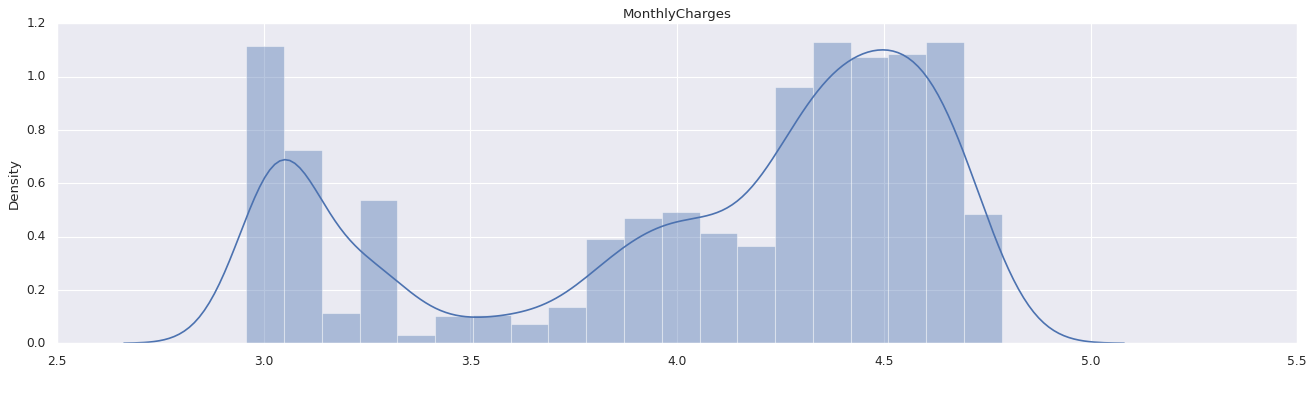

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects
sns.distplot(np.log1p(cleaned_data["MonthlyCharges"]), ax=ax1)
ax1.set_title("MonthlyCharges")

ax1.set_xlabel(" ");

In [ ]:
# Applying log transform to "Monthy Charges"
cleaned_data["MonthlyCharges"] = np.log1p(cleaned_data["MonthlyCharges"])

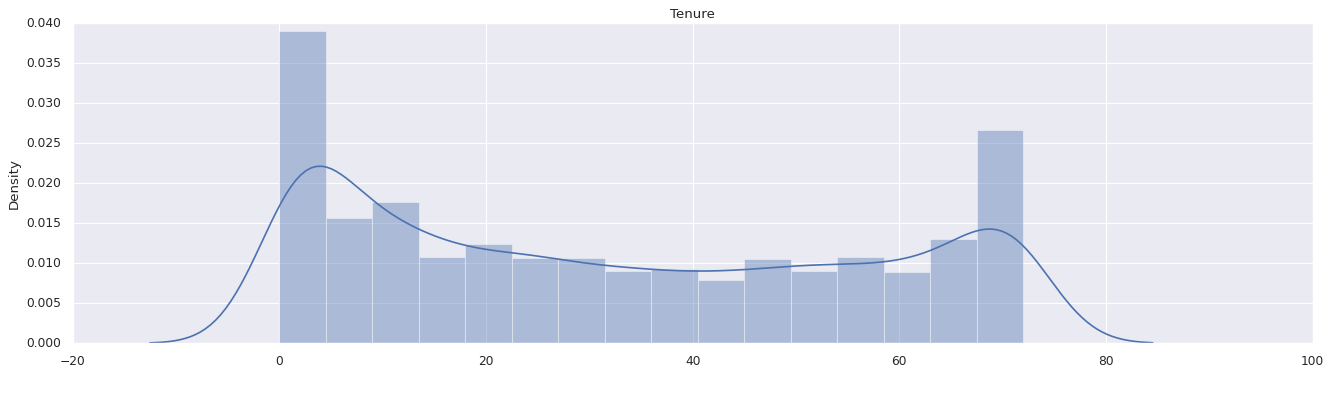

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects
sns.distplot((cleaned_data["tenure"]), ax=ax1)
ax1.set_title("Tenure")
ax1.set_xlabel(" ");

##### We have applied log transform to "MonthlyCharges" but not to tenure.

#### **3.3.3 Feature Scaling**

Scaling feature for faster optimization.

In [ ]:
sc = MinMaxScaler()

cleaned_data[['tenure']] = sc.fit_transform(cleaned_data[['tenure']])
cleaned_data[['MonthlyCharges']] = sc.fit_transform(cleaned_data[['MonthlyCharges']])

#### **3.3.4 Handling Categorical Variable**

Encoding categorical features.

In [ ]:
continuous_features = ["tenure", "MonthlyCharges"]
binary_features = ["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling"]
cat_features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"]

In [ ]:
cleaned_data["Partner"] = cleaned_data["Partner"].replace(dict_boolean)
cleaned_data["Dependents"] = cleaned_data["Dependents"].replace(dict_boolean)
cleaned_data["PaperlessBilling"] = cleaned_data["PaperlessBilling"].replace(dict_boolean)

In [ ]:
le1 = LabelEncoder()
multiple_lines = le1.fit_transform(cleaned_data["MultipleLines"])

le2 = LabelEncoder()
internet_service = le2.fit_transform(cleaned_data["InternetService"])

le3 = LabelEncoder()
online_security = le3.fit_transform(cleaned_data["OnlineSecurity"])

le4 = LabelEncoder()
online_backup = le4.fit_transform(cleaned_data["OnlineBackup"])

le5 = LabelEncoder()
device_protection = le5.fit_transform(cleaned_data["DeviceProtection"])

le6 = LabelEncoder()
tech_support = le6.fit_transform(cleaned_data["TechSupport"])

le7 = LabelEncoder()
streaming_TV = le7.fit_transform(cleaned_data["StreamingTV"])

le8 = LabelEncoder()
streaming_movies = le8.fit_transform(cleaned_data["StreamingMovies"])

le9 = LabelEncoder()
payment_method = le9.fit_transform(cleaned_data["PaymentMethod"])

In [ ]:
ohe1 = OneHotEncoder()
multiple_lines_ohe = ohe1.fit_transform(multiple_lines.reshape(-1,1))
multiple_lines_ohe = pd.DataFrame(multiple_lines_ohe.toarray(), columns = ["MultipleLines_" +col for col in le1.classes_])

ohe2 = OneHotEncoder()
internet_service_ohe = ohe2.fit_transform(internet_service.reshape(-1,1))
internet_service_ohe = pd.DataFrame(internet_service_ohe.toarray(), columns = ["InternetService_" +col for col in le2.classes_])

ohe3 = OneHotEncoder()
online_security_ohe = ohe3.fit_transform(online_security.reshape(-1,1))
online_security_ohe = pd.DataFrame(online_security_ohe.toarray(), columns = ["OnlineSecurity_" +col for col in le3.classes_])

ohe4 = OneHotEncoder()
online_backup_ohe = ohe4.fit_transform(online_backup.reshape(-1,1))
online_backup_ohe = pd.DataFrame(online_backup_ohe.toarray(), columns = ["OnlineBackup_" +col for col in le4.classes_])

ohe5 = OneHotEncoder()
device_protection_ohe = ohe5.fit_transform(device_protection.reshape(-1,1))
device_protection_ohe = pd.DataFrame(device_protection_ohe.toarray(), columns = ["DeviceProtection_" +col for col in le5.classes_])

ohe6 = OneHotEncoder()
tech_support_ohe = ohe6.fit_transform(tech_support.reshape(-1,1))
tech_support_ohe = pd.DataFrame(tech_support_ohe.toarray(), columns = ["TechSupport_" +col for col in le6.classes_])

ohe7 = OneHotEncoder()
streaming_TV_ohe = ohe7.fit_transform(streaming_TV.reshape(-1,1))
streaming_TV_ohe = pd.DataFrame(streaming_TV_ohe.toarray(), columns = ["StreamingTV_" +col for col in le7.classes_])

ohe8 = OneHotEncoder()
streaming_movies_ohe = ohe8.fit_transform(streaming_movies.reshape(-1,1))
streaming_movies_ohe = pd.DataFrame(streaming_movies_ohe.toarray(), columns = ["StreamingMovies_" +col for col in le8.classes_])

ohe9 = OneHotEncoder()
payment_method_ohe = ohe9.fit_transform(payment_method.reshape(-1,1))
payment_method_ohe = pd.DataFrame(payment_method_ohe.toarray(), columns = ["PaymentMethod_" +col for col in le9.classes_])


## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited algorithm.

In [ ]:
# Concatenating the features and preparing data for tree-based alogirthms

y = cleaned_data[["Churn"]]
X_tree =  pd.concat([telco_data[continuous_features],
                     cleaned_data[binary_features],
                     multiple_lines_ohe,
                     internet_service_ohe,
                     online_security_ohe,
                     online_backup_ohe,
                     device_protection_ohe,
                     tech_support_ohe,
                     streaming_TV_ohe,
                     streaming_movies_ohe,
                     payment_method_ohe],
                    axis = 1
                    )


In [ ]:
# Dropping one encoded feature to prevent overfitting

multiple_lines_ohe.drop([multiple_lines_ohe.columns[len(multiple_lines_ohe.columns)-1]], axis=1, inplace = True)
internet_service_ohe.drop([internet_service_ohe.columns[len(internet_service_ohe.columns)-1]], axis=1, inplace = True)
online_security_ohe.drop([online_security_ohe.columns[len(online_security_ohe.columns)-1]], axis=1, inplace = True)
online_backup_ohe.drop([online_backup_ohe.columns[len(online_backup_ohe.columns)-1]], axis=1, inplace = True)
device_protection_ohe.drop([device_protection_ohe.columns[len(device_protection_ohe.columns)-1]], axis=1, inplace = True)
tech_support_ohe.drop([tech_support_ohe.columns[len(tech_support_ohe.columns)-1]], axis=1, inplace = True)
streaming_TV_ohe.drop([streaming_TV_ohe.columns[len(streaming_TV_ohe.columns)-1]], axis=1, inplace = True)
streaming_movies_ohe.drop([streaming_movies_ohe.columns[len(streaming_movies_ohe.columns)-1]], axis=1, inplace = True)
payment_method_ohe.drop([payment_method_ohe.columns[len(payment_method_ohe.columns)-1]], axis=1, inplace = True)

In [ ]:
# Concatenating the features and preparing data for gd- or distance-based alogirthms

X_scaled =  pd.concat([cleaned_data[continuous_features],
                       cleaned_data[binary_features],
                       multiple_lines_ohe,
                       internet_service_ohe,
                       online_security_ohe,
                       online_backup_ohe,
                       device_protection_ohe,
                       tech_support_ohe,
                       streaming_TV_ohe,
                       streaming_movies_ohe,
                       payment_method_ohe],
                      axis = 1
                      )

### **4.1 Train/test Splitting**

We can split the data for train/test and segregate the independent and dependent features.

In [ ]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree.values, y.values, test_size=0.2, random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape,
      '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (5634, 34) 	X_test.shape:  (1409, 34) 
Y_train.shape:  (5634, 1) 	Y_test.shape:  (1409, 1)


In [ ]:
# Implementing SMOTE
smt = SMOTE(random_state=10)
X_tree_train_SMOTE, y_tree_train_SMOTE = smt.fit_resample(X_tree_train, y_tree_train)

In [ ]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled.values, y.values, test_size=0.2, random_state=42)
print('X_train.shape: ', X_scaled_train.shape, '\tX_test.shape: ', X_scaled_test.shape, '\nY_train.shape: ',
      y_scaled_train.shape, '\tY_test.shape: ', y_scaled_test.shape)

X_train.shape:  (5634, 25) 	X_test.shape:  (1409, 25) 
Y_train.shape:  (5634, 1) 	Y_test.shape:  (1409, 1)


In [ ]:
# Implementing SMOTE
smt = SMOTE(random_state=10)
X_scaled_train_SMOTE, y_scaled_train_SMOTE = smt.fit_resample(X_scaled_train, y_scaled_train)

In [ ]:
print("The unique values of Churn for Tree-algos are :", np.unique(y_tree_train_SMOTE, return_counts=True))
print("The unique values of Churn for non-tree-algos are :", np.unique(y_tree_train_SMOTE, return_counts=True))

The unique values of Churn for Tree-algos are : (array([0, 1]), array([4138, 4138]))
The unique values of Churn for non-tree-algos are : (array([0, 1]), array([4138, 4138]))


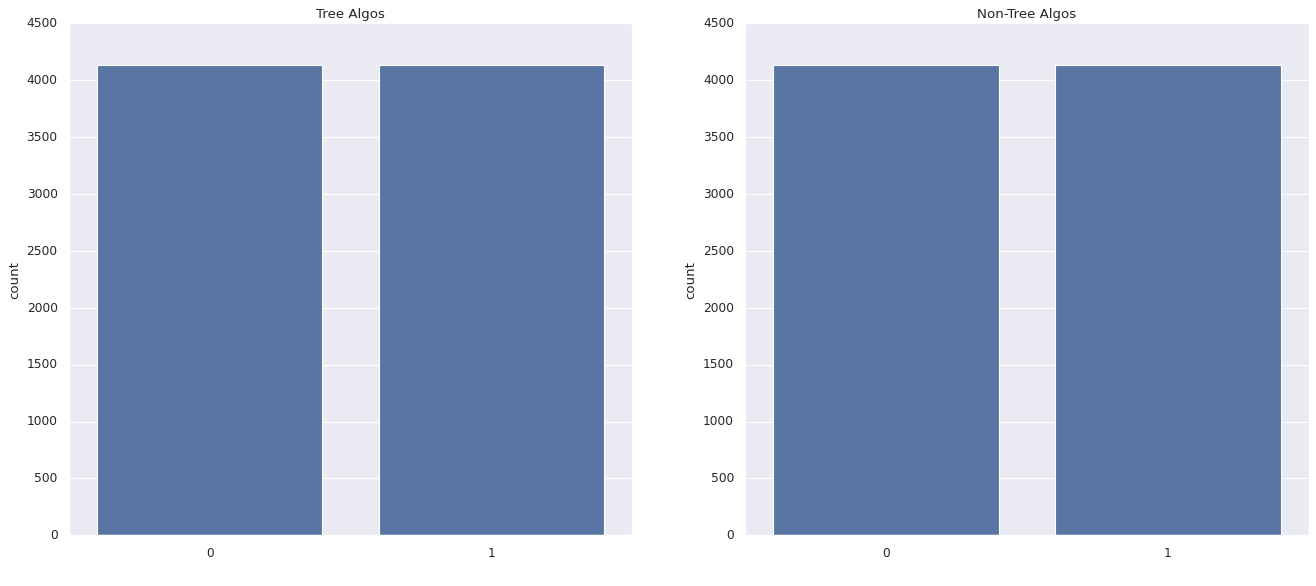

In [ ]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig, (ax1, ax2) = plot_objects

sns.countplot(x = "Class", data = pd.DataFrame(y_tree_train_SMOTE, columns=["Class"]), ax=ax1)
ax1.set_title("Tree Algos")
ax1.set_xlabel(" ")

sns.countplot(x = "Class", data = pd.DataFrame(y_scaled_train_SMOTE, columns=["Class"]), ax=ax2)
ax2.set_title("Non-Tree Algos")
ax2.set_xlabel(" ");


### **4.2 Model Fitting**

Fitting various models and checking its accuracy.

In [ ]:
# Initializaing various classification algorithms. We are using Stratified Kfold with f1 as scoring parameter.

models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_tree_train_SMOTE, y_tree_train_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.776747 (0.003444)
GNB: 0.770245 (0.003363)
DTC: 0.803010 (0.004360)
RFC: 0.843600 (0.005609)
ABC: 0.834341 (0.010095)
GBT: 0.849450 (0.008391)
XGB: 0.842269 (0.007131)


In [ ]:
# Initializaing various classification algorithms

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle =True, random_state=42)
    cv_results = cross_val_score(model, X_scaled_train_SMOTE, y_scaled_train_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769021 (0.007282)
KNN: 0.799203 (0.005287)
SVM: 0.803541 (0.002376)
LSC: 0.772047 (0.005646)


##### As we can see that the best f1 score we get is around 81%.
We will select RandomForest and Xgboost for hyperparameter optimization to see if we can increase the accuracy.

### **4.3 Hyperparameter Optimization**

Applying hyperparameter optimization techniques to select best parameters that give us high accuracy.

In [ ]:
def model_report(model_name, model, X_train, y_train, X_test, y_test):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value

    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1)
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11),
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21),
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc))
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()

    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []


"""""" LogisticRegression """"""

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
0.7632, 0.7627, 0.7622, 0.7614, 0.7610, 0.7604, 0.7602, 0.7603, 0.7603, 0.7605, 0.7609, 0.7608, 0.7616, 0.7615, 0.7615, 0.7619, 0.7626, 0.7629, 0.7633, 0.7633, 0.7639, 0.7642, 0.7642, 0.7637, 0.7638, 0.7645, 0.7637, 0.7634, 0.7636, 0.7635, 0.7630, 0.7643, 0.7646, 0.7651, 0.7652, 0.7646, 0.7651, 0.7653, 0.7664, 0.7670, 0.7667, 0.7670, 0.7674, 0.7677, 0.7682, 0.7687, 0.7689, 0.7691, 0.7687, 0.7692, 0.7692, 0.7692, 0.7688, 0.7692, 0.7702, 0.7706, 0.7705, 0.7703, 0.7701, 0.7707, 0.7706, 0.7705, 0.7708, 0.7706, 0.7697, 0.7694, 0.7697, 0.7697, 0.7699, 0.7700, 0.7697, 0.7698, 0.7692, 0.7688, 0.7691, 0.7692, 0.7691, 0.7689, 0.7686, 0.7685, 0.7684, 0.7679, 0.7682, 0.7676, 0.7681, 0.7673, 0.7681, 0.7680, 0.7683, 0.7680, 0.7682, 0.7686, 0.7680, 0.7682, 0.7686, 0.7677, 0.7683, 0.7686, 0.7686, 0.7688, 0.7691, 0.7691, 0.7694, 0.7695, 

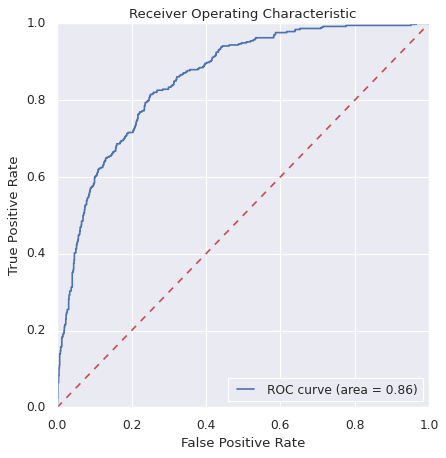

In [ ]:
print('\n"""""" LogisticRegression """"""')
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')

kf = KFold(n_splits=5, random_state=21, shuffle=True)
score_list = []
c_list = 10**np.linspace(-3,3,200)

for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_scaled_train_SMOTE, y_scaled_train_SMOTE, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl

print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

logit = LogisticRegression(C = optimal_c)
model_report('LogisticRegression', logit, X_scaled_train_SMOTE, y_scaled_train_SMOTE, X_scaled_test, y_scaled_test )

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_tree_train_SMOTE, y_tree_train_SMOTE)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 59, 68, 77, 86, 95,
                                                         105, 114, 123, 132,
                                                         141, 151, 160, 169,
                                                         178, 187, 196, 206,
                                                         215, 224, 233, 242,
                                                         252, 261, 270, 279,
                                                         288, 297, 307, 316, ...]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 362,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
rf_final = RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=362)
rf_final.fit(X_tree_train_SMOTE, y_tree_train_SMOTE)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=362)


"""""" RandomForestClassifier """""" (quite slow)

Search for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4186,  0.100->0.5175,  0.200->0.5820,  0.300->0.6160,  0.400->0.6276,  0.500->0.6073,  0.600->0.5749,  0.700->0.4870,  0.800->0.3284,  0.900->0.0160,  1.000->0.0000,  
Looping decimal place 2
0.300->0.6160,  0.310->0.6152,  0.320->0.6173,  0.330->0.6178,  0.340->0.6222,  0.350->0.6259,  0.360->0.6254,  0.370->0.6278,  0.380->0.6258,  0.390->0.6306,  0.400->0.6276,  0.410->0.6286,  0.420->0.6281,  0.430->0.6196,  0.440->0.6188,  0.450->0.6173,  0.460->0.6195,  0.470->0.6110,  0.480->0.6063,  0.490->0.6109,  0.500->0.6073,  
Looping decimal place 3
0.380->0.6258,  0.381->0.6265,  0.382->0.6272,  0.383->0.6286,  0.384->0.6293,  0.385->0.6293,  0.386->0.6308,  0.387->0.6292,  0.388->0.6299,  0.389->0.6299, 

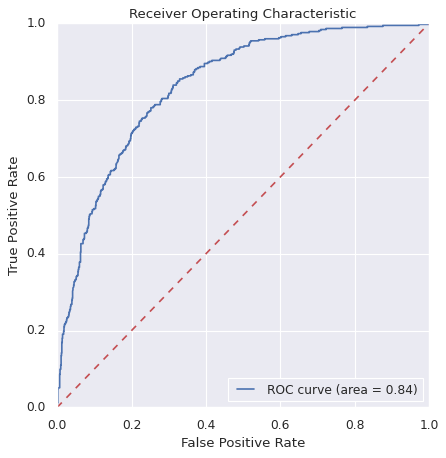

In [ ]:
print('\n"""""" RandomForestClassifier """""" (quite slow)')

print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
model_report('RandomForestClassifier', rf_final, X_tree_train_SMOTE, y_tree_train_SMOTE, X_tree_test, y_tree_test)

model_list.append('RandomForestClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

In [ ]:
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
           }

xgb_clf = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgb_clf, param_distributions = xgb_para, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(X_tree_train_SMOTE, y_tree_train_SMOTE)
xgb_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}


"""""" RandomForestClassifier """""" (quite slow)

Search for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4186,  0.100->0.5564,  0.200->0.6113,  0.300->0.6132,  0.400->0.6090,  0.500->0.6003,  0.600->0.5065,  0.700->0.4686,  0.800->0.3636,  0.900->0.2170,  1.000->0.0000,  
Looping decimal place 2
0.200->0.6113,  0.210->0.6120,  0.220->0.6114,  0.230->0.6104,  0.240->0.6160,  0.250->0.6195,  0.260->0.6232,  0.270->0.6188,  0.280->0.6174,  0.290->0.6115,  0.300->0.6132,  0.310->0.6124,  0.320->0.6096,  0.330->0.6058,  0.340->0.6068,  0.350->0.5995,  0.360->0.6017,  0.370->0.6032,  0.380->0.6017,  0.390->0.6060,  0.400->0.6090,  
Looping decimal place 3
0.250->0.6195,  0.251->0.6202,  0.252->0.6202,  0.253->0.6215,  0.254->0.6221,  0.255->0.6213,  0.256->0.6220,  0.257->0.6218,  0.258->0.6218,  0.259->0.6225, 

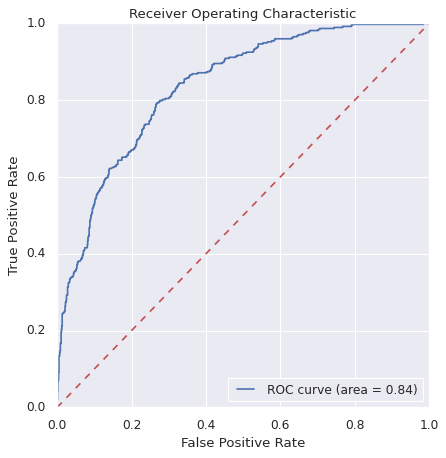

In [ ]:
print('\n"""""" RandomForestClassifier """""" (quite slow)')

print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
xgb_final = XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1)

model_report('XgboostClassifier', xgb_final, X_tree_train_SMOTE, y_tree_train_SMOTE, X_tree_test, y_tree_test)

model_list.append('XgboostClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

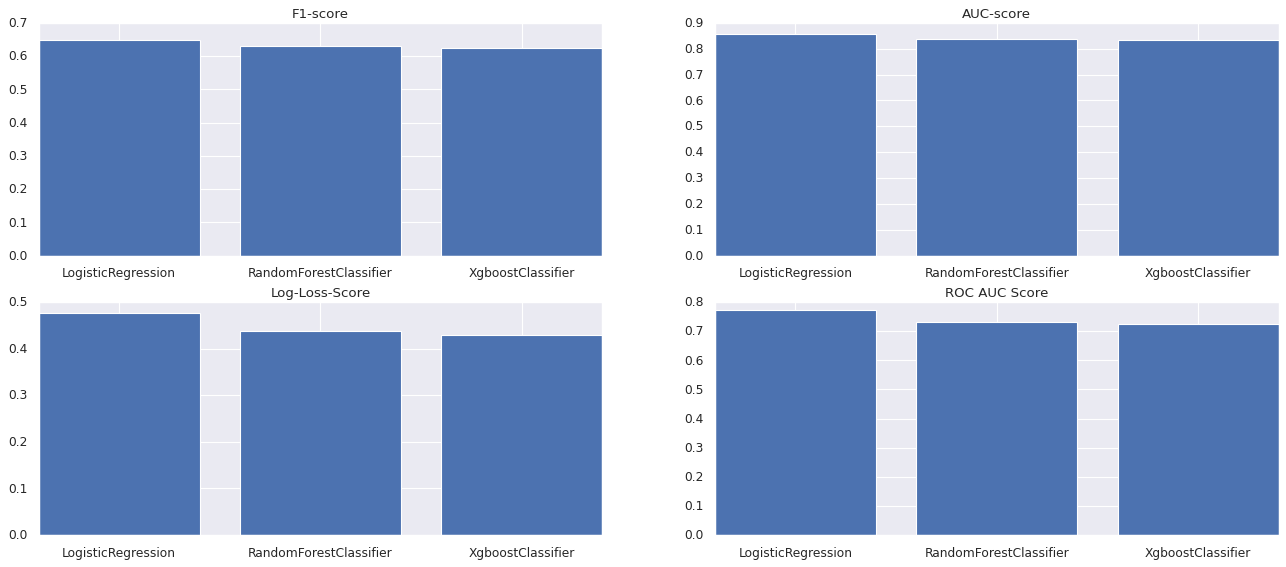

In [ ]:
## plot the classification report scores

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))
ax1.bar(model_list, f1_list)
ax1.set_title('F1-score')
ax2.bar(model_list, auc_list)
ax2.set_title('AUC-score')
ax3.bar(model_list, ll_list)
ax3.set_title('Log-Loss-Score')
ax4.bar(model_list, roc_auc_list)
ax4.set_title('ROC AUC Score')

# Fine-tune figure: make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

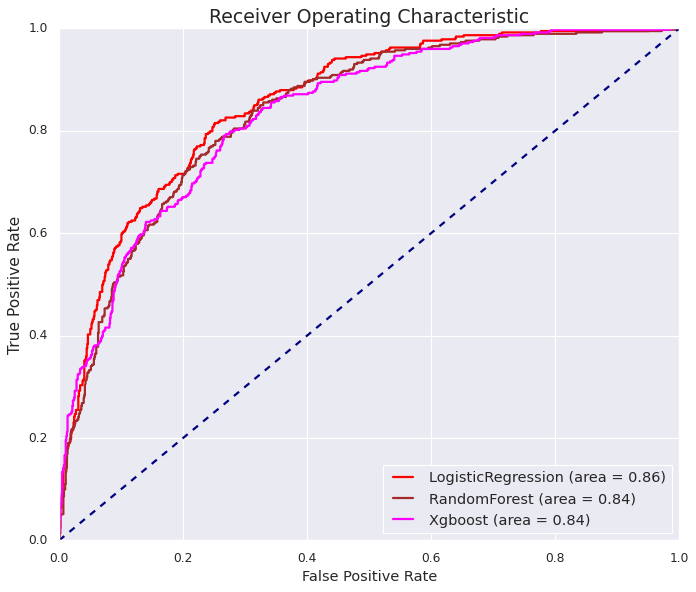

In [ ]:
# plot the ROC curves
plt.figure(figsize=(10,8))

y_pred = logit.predict_proba(X_scaled_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_scaled_test, y_pred)
plt.plot(fpr, tpr, color='red', lw=2, label='LogisticRegression (area = %0.2f)' % auc_list[0])

y_pred = rf_final.predict_proba(X_tree_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_tree_test, y_pred)
plt.plot(fpr, tpr, color='brown', lw=2, label='RandomForest (area = %0.2f)' % auc_list[1])

y_pred = xgb_final.predict_proba(X_tree_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_tree_test, y_pred)
plt.plot(fpr, tpr, color='magenta', lw=2, label='Xgboost (area = %0.2f)' % auc_list[2])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.60      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Accuracy Score :  0.7934705464868701


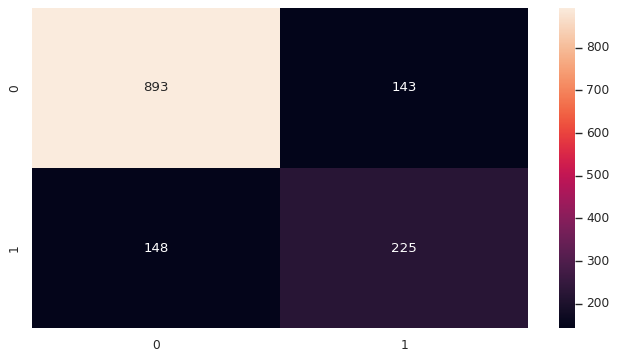

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_final.predict(X_tree_test)

print(classification_report(y_tree_test, y_pred))

#Get the confusion matrix
cf_matrix = confusion_matrix(y_tree_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

print("Accuracy Score : ", accuracy_score(y_tree_test, y_pred))

### **4.4 Saving the Model**

Saving the model

In [ ]:
import pickle
import json

In [ ]:
with open('churn_prediction.pickle','wb') as f:
    pickle.dump(rf_final, f)

In [ ]:
cat_feature_columns = {
    "Partner" : dict_boolean,
    "Dependents" : dict_boolean,
    "PaperlessBilling" : dict_boolean,
    "multiple_lines" : [col for col in le1.classes_],
    "internet_service" : [col for col in le2.classes_],
    "online_security" : [col for col in le3.classes_],
    "online_backup" : [col for col in le4.classes_],
    "device_protection" : [col for col in le5.classes_],
    "tech_support" : [col for col in le6.classes_],
    "streaming_TV" : [col for col in le7.classes_],
    "streaming_movies" : [col for col in le8.classes_],
    "payment_method" : [col for col in le9.classes_],
    "data_columns" : [col for col in X_tree.columns],
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))

## **5. Conclusion**

Out of various classification algorithms, Random Forest tend to gives most balanced performance with:
1.   Accuracy Score = 79%
2.   Precision = 61%
3.   Recall = 61%
4.   F1 Score = 61%
5.   AUC = 0.86

